In [1]:
#conda install pandas

In [2]:
#conda install matplotlib

In [3]:
#conda install statsmodels

In [4]:
#conda install numpy

In [5]:
#conda install -c conda-forge yfinance

In [6]:
#pip install arch


In [7]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import pymc3 as pm
import warnings

/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
start_date='2014-01-01'
end_date='2020-03-29'
ticker1='^GSPC'
ticker2='^FTSE'

In [9]:
SP500_Cprices= yf.download(ticker1,start_date,end_date)['Adj Close']
print(SP500_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    1831.979980
2014-01-03    1831.369995
2014-01-06    1826.770020
2014-01-07    1837.880005
2014-01-08    1837.489990
                 ...     
2020-03-23    2237.399902
2020-03-24    2447.330078
2020-03-25    2475.560059
2020-03-26    2630.070068
2020-03-27    2541.469971
Name: Adj Close, Length: 1570, dtype: float64


In [10]:
SP500_Cprices.to_csv("SP500_Cprices")

In [11]:
SP500=pd.read_csv("SP500_Cprices",index_col='Date')

In [12]:
SP500.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [13]:
SP500['Return'] = 100 * SP500.Close.pct_change().dropna()

In [14]:
SP500['Volatility']=SP500['Return'].rolling(window=20).std().dropna()

In [15]:
SP500.dropna(inplace=True)

In [16]:
print(SP500)

                  Close    Return  Volatility
Date                                         
2014-01-31  1782.589966 -0.646530    0.791193
2014-02-03  1741.890015 -2.283192    0.924846
2014-02-04  1755.199951  0.764109    0.952015
2014-02-05  1751.640015 -0.202822    0.933074
2014-02-06  1773.430054  1.243979    0.989570
...                 ...       ...         ...
2020-03-23  2237.399902 -2.929387    5.387918
2020-03-24  2447.330078  9.382774    5.912797
2020-03-25  2475.560059  1.153501    5.931880
2020-03-26  2630.070068  6.241416    6.083349
2020-03-27  2541.469971 -3.368735    6.118244

[1550 rows x 3 columns]


In [17]:
SP500.describe()

,Close,Return,Volatility
count,1550.000000,1550.000000,1550.000000
mean,2399.933844,0.028298,0.792117
std,400.424169,1.076257,0.560055
min,1741.890015,-11.984055,0.207155
25%,2061.352478,-0.294832,0.468495
50%,2345.444946,0.053496,0.648824
75%,2747.192566,0.470730,0.948186
max,3386.149902,9.382774,6.118244


In [18]:
FTSE_Cprices= yf.download(ticker2,start_date,end_date)['Adj Close']
print(FTSE_Cprices)

[*********************100%***********************]  1 of 1 completed
Date
2014-01-02    6717.899902
2014-01-03    6730.700195
2014-01-06    6730.700195
2014-01-07    6755.500000
2014-01-08    6721.799805
                 ...     
2020-03-23    4993.899902
2020-03-24    5446.000000
2020-03-25    5688.200195
2020-03-26    5815.700195
2020-03-27    5510.299805
Name: Adj Close, Length: 1579, dtype: float64


In [19]:
FTSE_Cprices.to_csv("FTSE_Cprices")

In [20]:
FTSE=pd.read_csv("FTSE_Cprices",index_col='Date')

In [21]:
FTSE.rename(columns={'Adj Close': 'Close'}, inplace=True)

In [22]:
FTSE['Return'] = 100 * FTSE.Close.pct_change().dropna()

In [23]:
FTSE['Volatility']=FTSE['Return'].rolling(window=20).std()

In [24]:
FTSE.dropna(inplace=True)

In [25]:
print(FTSE)

                  Close    Return  Volatility
Date                                         
2014-01-30  6538.500000 -0.088624    0.647529
2014-01-31  6510.399902 -0.429764    0.646058
2014-02-03  6465.700195 -0.686589    0.655050
2014-02-04  6449.299805 -0.253652    0.641333
2014-02-05  6457.899902  0.133349    0.642947
...                 ...       ...         ...
2020-03-23  4993.899902 -3.793248    3.473790
2020-03-24  5446.000000  9.053047    4.225981
2020-03-25  5688.200195  4.447304    4.399480
2020-03-26  5815.700195  2.241482    4.413114
2020-03-27  5510.299805 -5.251309    4.498435

[1559 rows x 3 columns]


In [26]:
FTSE.describe()

,Close,Return,Volatility
count,1559.000000,1559.000000,1559.000000
mean,6960.921676,-0.006081,0.814527
std,495.421639,0.991611,0.423983
min,4993.899902,-10.873819,0.230632
25%,6678.199951,-0.454266,0.559997
50%,7016.899902,0.038762,0.716369
75%,7367.199951,0.471391,0.925860
max,7877.500000,9.053047,4.498435


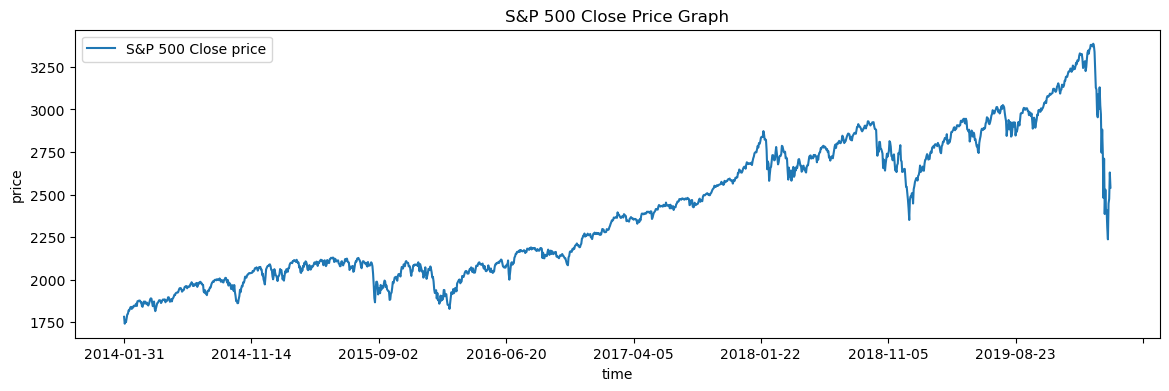

In [27]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Close", label="S&P 500 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("S&P 500 Close Price Graph")
ax.legend()
plt.show()

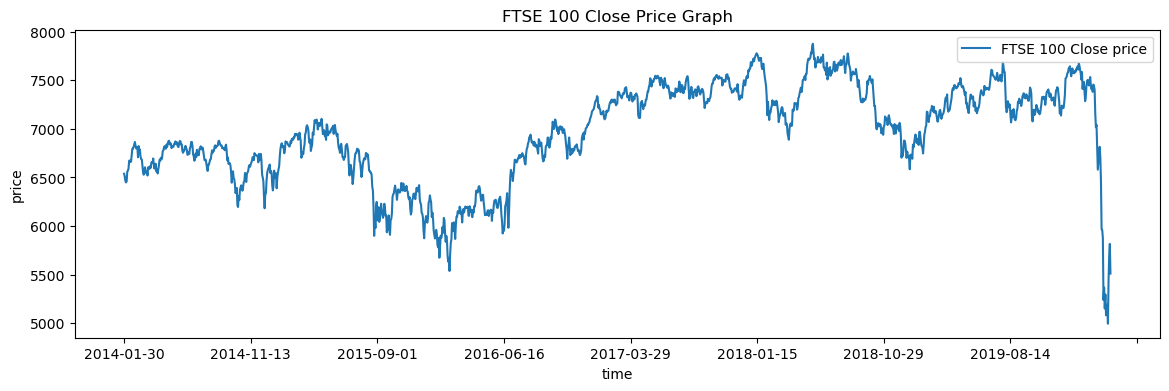

In [28]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Close", label="FTSE 100 Close price", ax=ax)
ax.set(xlabel="time", ylabel="price")
ax.set_title("FTSE 100 Close Price Graph")
ax.legend()
plt.show()

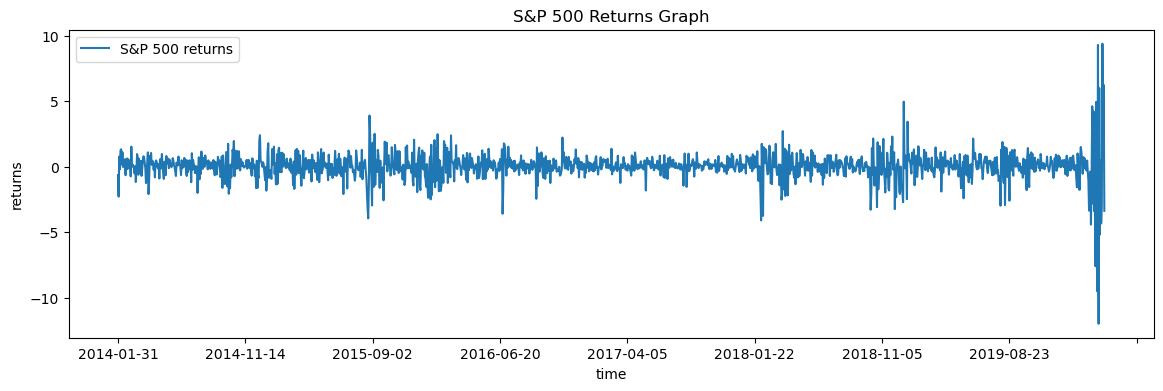

In [29]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Return", label="S&P 500 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 Returns Graph")
ax.legend()
plt.show()

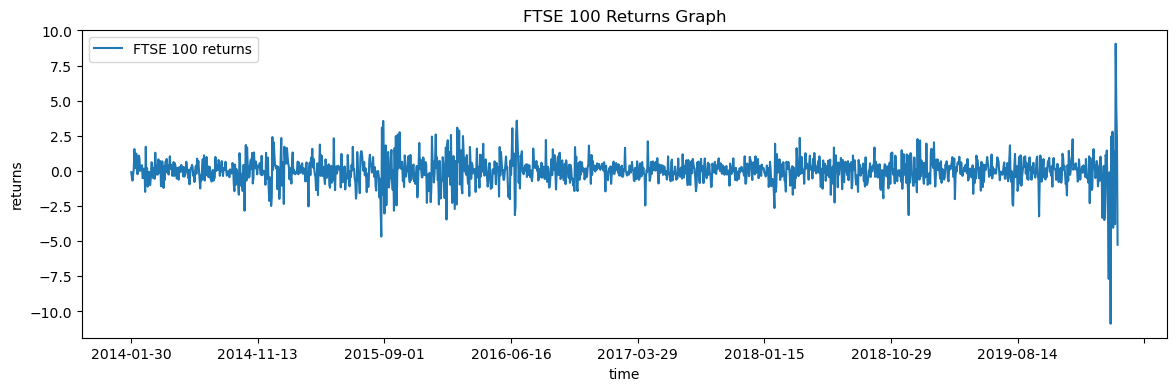

In [30]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Return", label="FTSE 100 returns", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 Returns Graph")
ax.legend()
plt.show()

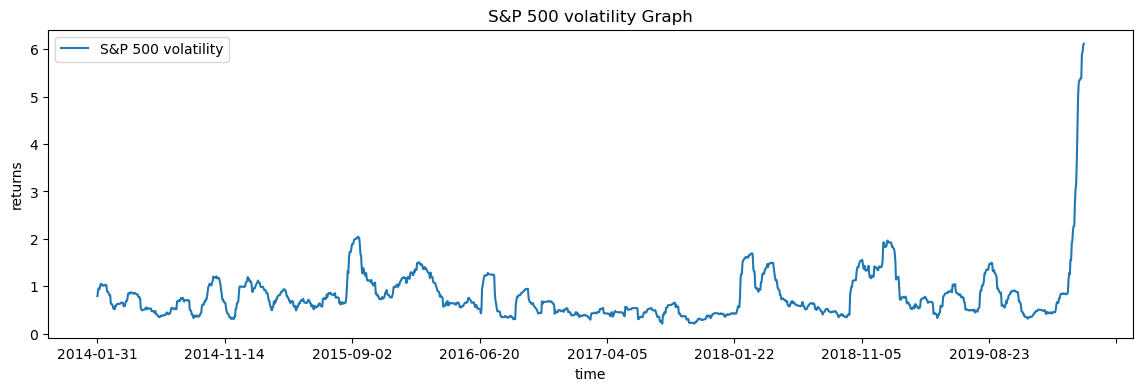

In [31]:
fig, ax = plt.subplots(figsize=(14, 4))
SP500.plot(y="Volatility", label="S&P 500 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("S&P 500 volatility Graph")
ax.legend()
plt.show()

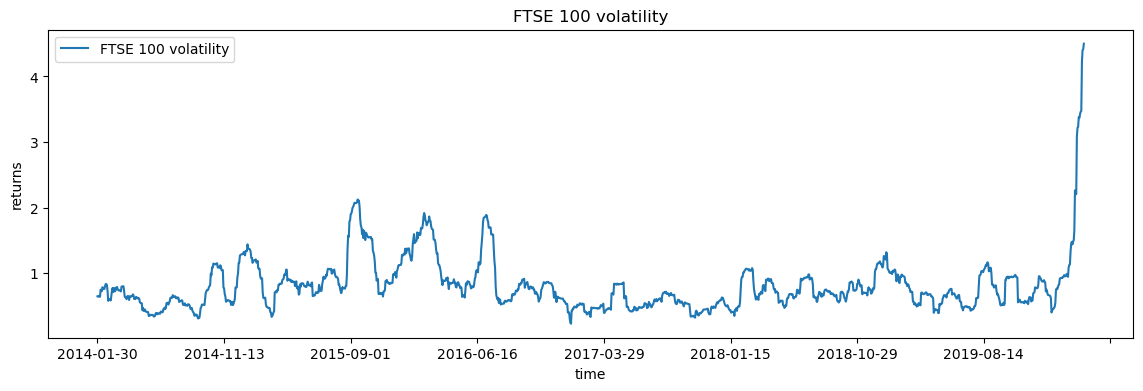

In [32]:
fig, ax = plt.subplots(figsize=(14, 4))
FTSE.plot(y="Volatility", label="FTSE 100 volatility", ax=ax)
ax.set(xlabel="time", ylabel="returns")
ax.set_title("FTSE 100 volatility")
ax.legend()
plt.show()

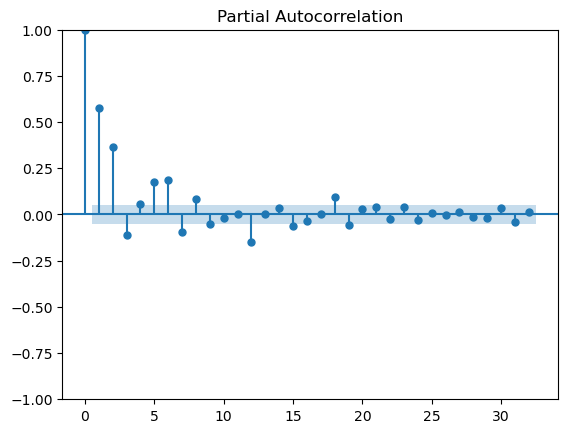

In [33]:
plot_pacf(SP500.Return**2)
plt.show()

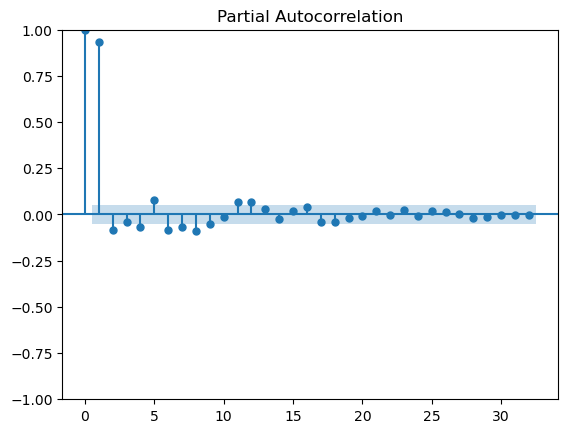

In [34]:
plot_pacf(SP500.Volatility**2)
plt.show()

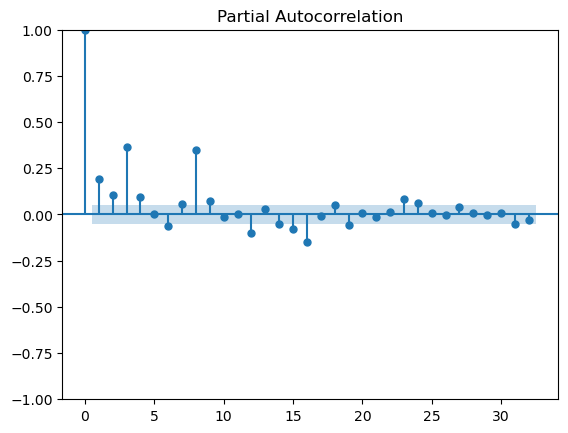

In [35]:
plot_pacf(FTSE.Return**2)
plt.show()

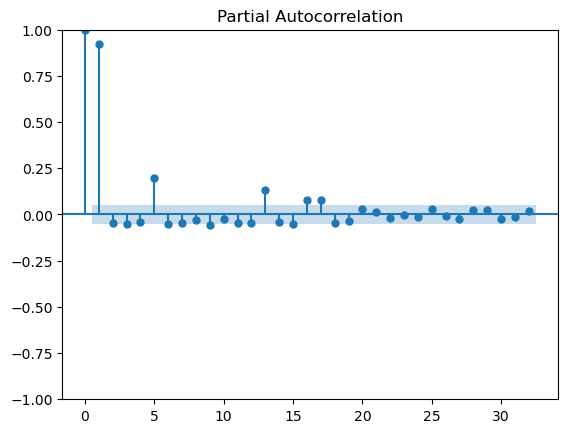

In [36]:
plot_pacf(FTSE.Volatility**2)
plt.show()

In [37]:
test_size1 = 20

In [38]:
test_size2 = 20

In [39]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [40]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [41]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=1,q=1,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     40,   Neg. LLF: 2238.432868566622
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1780.4599613237303
Iteration:     15,   Func. Count:    107,   Neg. LLF: 1618.7807715495298
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.7807715495298
            Iterations: 16
            Function evaluations: 112
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.78
Distribution:      Standardized Student's t   AIC:                           3247.56
Method:                  Maximum Likelihood   BIC:                           3274.23
                                              No. Observations:                 1530
Date:                      Sat, Sep 09 2023   Df Residuals:                     1529
Time:                              21:32:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0831  1.364e-02      6.091  1.125e-09 [5.633e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  8.065e-03      3.662  2.501e-04 [1.373e-02,4.535e-02]
alpha[1]       0.2211  3.604e-02      6.136  8.485e-10     [  0.151,  0.292]
beta[1]        0.7631  3.150e-02     24.226 1.193e-129     [  0.701,  0.825]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.9045      0.642      7.644  2.108e-14 [  3.647,  6.162]
========================================================================

Covariance estimator: robust
"""

In [42]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=1,q=2,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1671.243563210772
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1619.3227101603761
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1618.780772008618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.7807715281388
            Iterations: 16
            Function evaluations: 126
            Gradient evaluations: 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.78
Distribution:      Standardized Student's t   AIC:                           3249.56
Method:                  Maximum Likelihood   BIC:                           3281.56
                                              No. Observations:                 1530
Date:                      Sat, Sep 09 2023   Df Residuals:                     1529
Time:                              21:32:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0831  1.363e-02      6.096  1.090e-09 [5.636e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0295  8.313e-03      3.553  3.808e-04 [1.324e-02,4.583e-02]
alpha[1]       0.2211  4.548e-02      4.863  1.157e-06     [  0.132,  0.310]
beta[1]        0.7631      0.242      3.156  1.600e-03     [  0.289,  1.237]
beta[2]        0.0000      0.211      0.000      1.000     [ -0.414,  0.414]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.9046      0.642      7.643  2.121e-14 [  3.647,  6.162]
========================================================================

Covariance estimator: robust
"""

In [43]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=2,q=2,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     50,   Neg. LLF: 1883.9361817451108
Iteration:     10,   Func. Count:     94,   Neg. LLF: 1617.7394543556306
Iteration:     15,   Func. Count:    133,   Neg. LLF: 1617.7328327948453
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1617.732832794864
            Iterations: 15
            Function evaluations: 133
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1617.73
Distribution:      Standardized Student's t   AIC:                           3249.47
Method:                  Maximum Likelihood   BIC:                           3286.80
                                              No. Observations:                 1530
Date:                      Sat, Sep 09 2023   Df Residuals:                     1529
Time:                              21:32:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0830  1.368e-02      6.065  1.318e-09 [5.617e-02,  0.110]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0533  5.061e-02      1.054      0.292 [-4.586e-02,  0.153]
alpha[1]       0.1885  3.944e-02      4.779  1.758e-06    [  0.111,  0.266]
alpha[2]       0.2109      0.342      0.617      0.537    [ -0.459,  0.881]
beta[1]    2.7926e-09      1.574  1.774e-09      1.000    [ -3.085,  3.085]
beta[2]        0.5729      1.211      0.473      0.636    [ -1.801,  2.947]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.8859      0.637      7.671  1.702e-14 [  3.638,  6.134]
========================================================================

Covariance estimator: robust
"""

In [44]:
SP500_model_garch= arch_model(train1,vol="GARCH",p=2,q=1,dist='t')
SP500_results_garch=SP500_model_garch.fit(update_freq=5)
SP500_results_garch.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 1647.11803590728
Iteration:     10,   Func. Count:     85,   Neg. LLF: 1618.9077157465927
Iteration:     15,   Func. Count:    122,   Neg. LLF: 1618.6266251928234
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1618.626624103964
            Iterations: 17
            Function evaluations: 135
            Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1618.63
Distribution:      Standardized Student's t   AIC:                           3249.25
Method:                  Maximum Likelihood   BIC:                           3281.25
                                              No. Observations:                 1530
Date:                      Sat, Sep 09 2023   Df Residuals:                     1529
Time:                              21:32:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0829  1.362e-02      6.088  1.142e-09 [5.623e-02,  0.110]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0320  1.010e-02      3.164  1.554e-03 [1.216e-02,5.175e-02]
alpha[1]       0.2034  4.670e-02      4.356  1.327e-05     [  0.112,  0.295]
alpha[2]       0.0326  5.967e-02      0.547      0.585  [-8.433e-02,  0.150]
beta[1]        0.7472  4.612e-02     16.200  5.062e-59     [  0.657,  0.838]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             4.8953      0.641      7.643  2.123e-14 [  3.640,  6.151]
========================================================================

Covariance estimator: robust
"""

In [45]:

from pandas.tseries.offsets import BDay
predictions1 = SP500_results_garch.forecast(horizon=7)
future_dates1 = [pd.to_datetime(train1.index[-1]) + BDay(i) for i in range(1,8)]
pred1 = pd.Series(np.sqrt(predictions1.variance.values[-1,:]), index=future_dates1)

Text(0.5, 1.0, 'Volatility Prediction S&P 500- Next 7 Days')

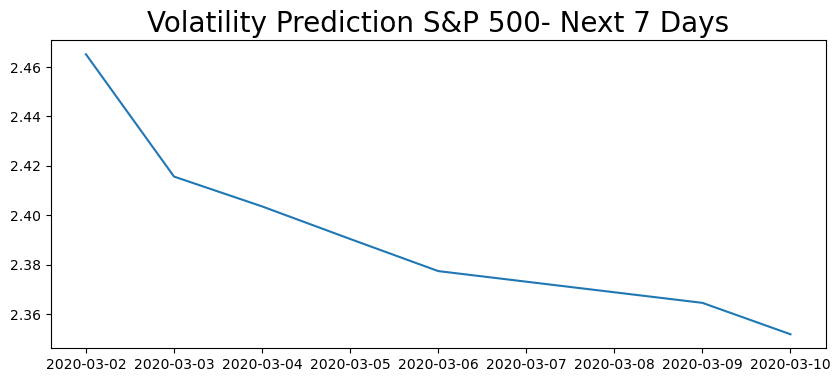

In [46]:
plt.figure(figsize=(10,4))
plt.plot(pred1)
plt.title('Volatility Prediction S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns S&P 500- Next 7 Days')

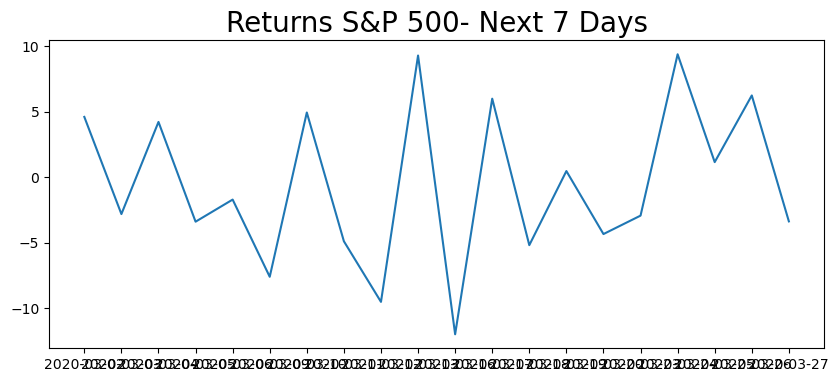

In [47]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Return[-test_size1:])
plt.title('Returns S&P 500- Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actual volatility S&P 500- Next 7 Days')

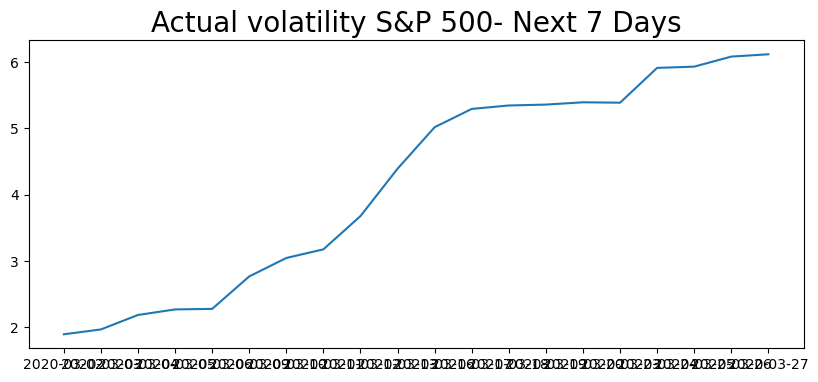

In [48]:
plt.figure(figsize=(10,4))
plt.plot(SP500.Volatility[-test_size1:])
plt.title('Actual volatility S&P 500- Next 7 Days', fontsize=20)

In [49]:
FTSE_model_garch= arch_model(train2[1:],vol="GARCH",p=1,q=1,dist='t')
FTSE_results_garch=FTSE_model_garch.fit(update_freq=5)
FTSE_results_garch.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: 1819.6303664132386
Iteration:     10,   Func. Count:     74,   Neg. LLF: 1773.9559122482747
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1773.9550775542982
            Iterations: 14
            Function evaluations: 97
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Constant Mean - GARCH Model Results                         
====================================================================================
Dep. Variable:                       Return   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -1773.96
Distribution:      Standardized Student's t   AIC:                           3557.91
Method:                  Maximum Likelihood   BIC:                           3584.60
                                              No. Observations:                 1538
Date:                      Sat, Sep 09 2023   Df Residuals:                     1537
Time:                              21:32:54   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0351  1.720e-02      2.041  4.125e-02 [1.394e-03,6.881e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0425  1.471e-02      2.887  3.891e-03 [1.364e-02,7.132e-02]
alpha[1]       0.1601  3.254e-02      4.920  8.633e-07   [9.634e-02,  0.224]
beta[1]        0.7908  4.298e-02     18.400  1.316e-75     [  0.707,  0.875]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             6.4287      0.947      6.790  1.124e-11 [  4.573,  8.284]
========================================================================

Covariance estimator: robust
"""

In [50]:
predictions2 = FTSE_results_garch.forecast(horizon=7)
future_dates2 = [pd.to_datetime(train2.index[-1]) + timedelta(days=i) for i in range(1,8)]
pred2 = pd.Series(np.sqrt(predictions2.variance.values[-1,:]), index=future_dates2)

Text(0.5, 1.0, 'Volatility Prediction FTSE 100 - Next 7 Days')

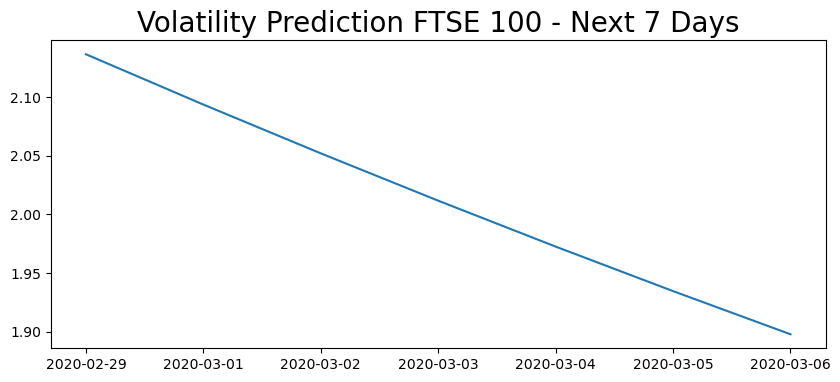

In [51]:

plt.figure(figsize=(10,4))
plt.plot(pred2)
plt.title('Volatility Prediction FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Returns FTSE 100 - Next 7 Days')

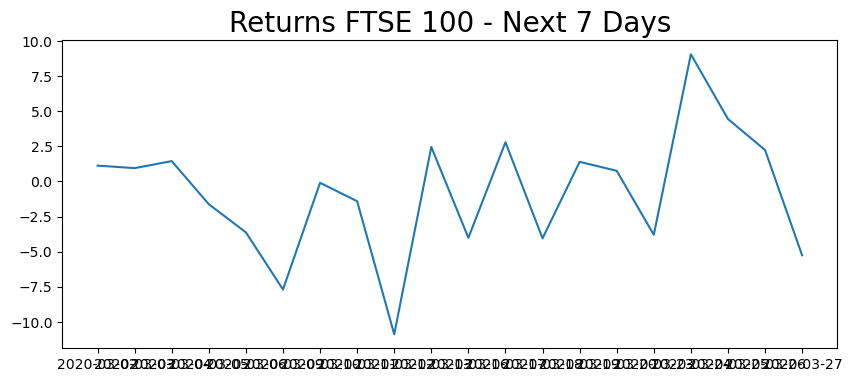

In [52]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Return[-test_size1:])
plt.title('Returns FTSE 100 - Next 7 Days', fontsize=20)

Text(0.5, 1.0, 'Actula volatility FTSE 100 - Next 7 Days')

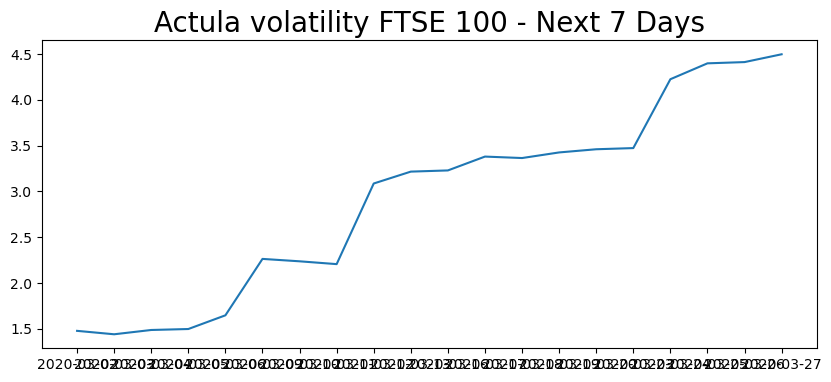

In [53]:
plt.figure(figsize=(10,4))
plt.plot(FTSE.Volatility[-test_size1:])
plt.title('Actula volatility FTSE 100 - Next 7 Days', fontsize=20)

In [54]:
test_size1 = 20

In [55]:
test_size2 = 20

In [56]:
train1, test1 = SP500.Return[:-test_size1], SP500.Return[-test_size1:]

In [57]:
train2, test2 = FTSE.Return[:-test_size2], FTSE.Return[-test_size2:]

In [58]:
rolling_predictions1 = []
for i in range(test_size1):
    train = SP500.Return[:-(test_size1-i)]
    model = arch_model(train, p=1, q=1,dist='t')
    model_fit = model.fit(disp='off',update_freq=5)
    pred = model_fit.forecast(horizon=1)
    rolling_predictions1.append(np.sqrt(pred.variance.values[-1,:][0]))

In [59]:
rolling_predictions1 = pd.Series(rolling_predictions1, index=SP500.Return.index[-test_size1:])

percent_Return=SP500.Return[-test_size1:]
percent_Volatility=SP500.Volatility[-test_size1:]
scaling_factor = 100 
rolling_predictions1=np.log1p(1 + rolling_predictions1 * scaling_factor)
SP500_Actual_test_Return=np.log1p(1 + percent_Return * scaling_factor)
SP500_Actual_test_Volatility=np.log1p(1 + percent_Volatility * scaling_factor)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

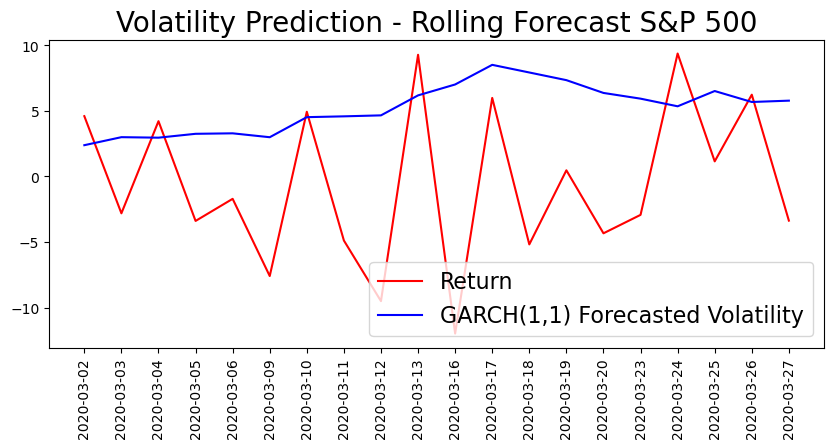

In [60]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Return[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Return', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

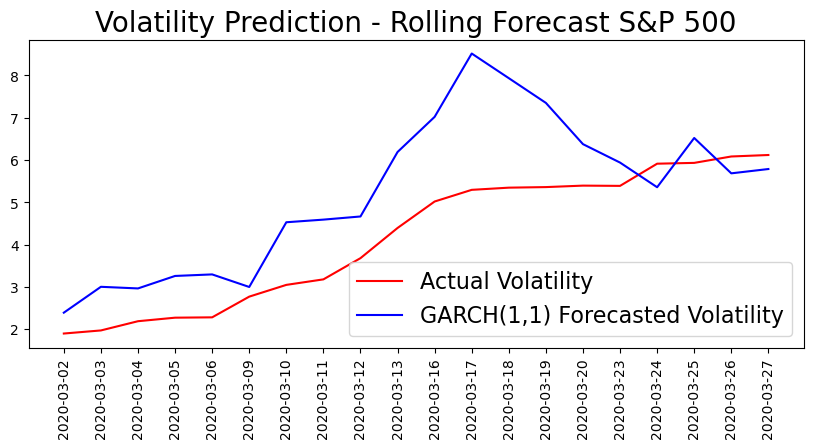

In [61]:
plt.figure(figsize=(10,4))
true, = plt.plot(SP500.Volatility[-test_size1:],color='red')
preds, = plt.plot(rolling_predictions1,color='blue')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [62]:
rolling_predictions2 = []
for i in range(test_size2):
    train = FTSE.Return[:-(test_size2-i)]
    model = arch_model(train, p=1, q=1,dist='t')
    model_fit = model.fit(disp='off',update_freq=5)
    pred = model_fit.forecast(horizon=1)
    rolling_predictions2.append(np.sqrt(pred.variance.values[-1,:][0]))

In [63]:
rolling_predictions2 = pd.Series(rolling_predictions2, index=FTSE.Return.index[-test_size2:])

scaling_factor = 100 
rolling_predictions1=np.log(1 + rolling_predictions1 * scaling_factor)
FTSE_Actual_test_Return=np.log(1 + FTSE.Return[-test_size1:] * scaling_factor)
FTSE_Actual_test_Volatility=np.log(1 + FTSE.Volatility[-test_size1:] * scaling_factor)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

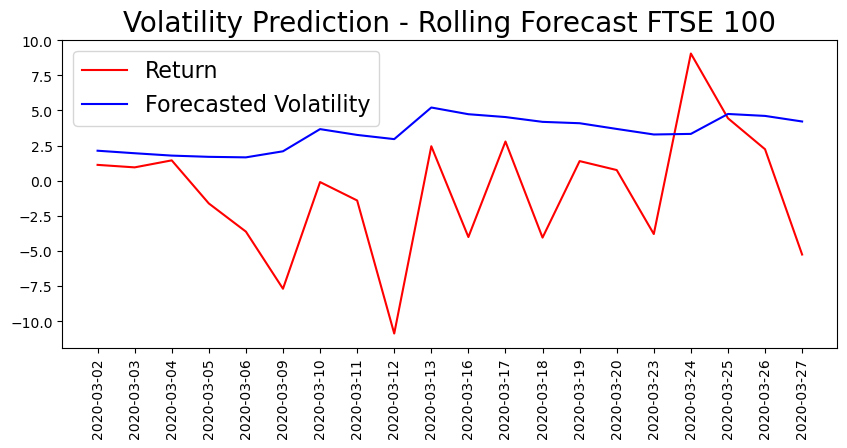

In [64]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Return[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Return', 'Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '2020-03-02'),
  Text(1, 0, '2020-03-03'),
  Text(2, 0, '2020-03-04'),
  Text(3, 0, '2020-03-05'),
  Text(4, 0, '2020-03-06'),
  Text(5, 0, '2020-03-09'),
  Text(6, 0, '2020-03-10'),
  Text(7, 0, '2020-03-11'),
  Text(8, 0, '2020-03-12'),
  Text(9, 0, '2020-03-13'),
  Text(10, 0, '2020-03-16'),
  Text(11, 0, '2020-03-17'),
  Text(12, 0, '2020-03-18'),
  Text(13, 0, '2020-03-19'),
  Text(14, 0, '2020-03-20'),
  Text(15, 0, '2020-03-23'),
  Text(16, 0, '2020-03-24'),
  Text(17, 0, '2020-03-25'),
  Text(18, 0, '2020-03-26'),
  Text(19, 0, '2020-03-27')])

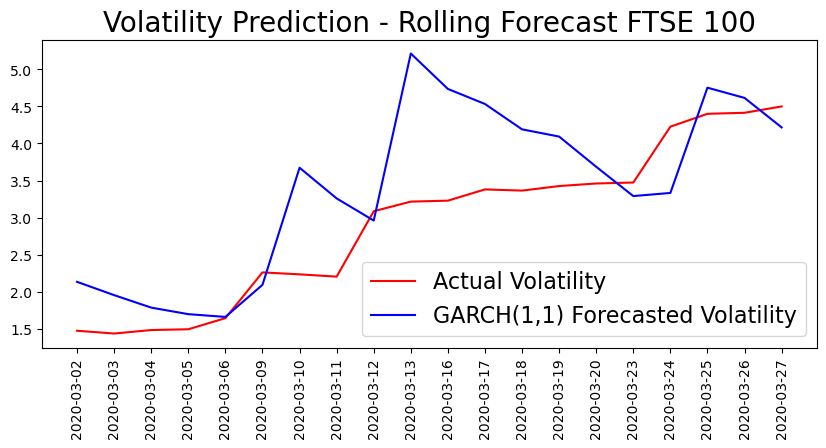

In [65]:
plt.figure(figsize=(10,4))
true, = plt.plot(FTSE.Volatility[-test_size2:],color='red')
preds, = plt.plot(rolling_predictions2,color='blue')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=20)
plt.legend(['Actual Volatility', 'GARCH(1,1) Forecasted Volatility'], fontsize=16)
plt.xticks(rotation='vertical')

In [66]:
def mean_squared_error(actual, predicted):
    """
    Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Squared Error (MSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    return mse

In [67]:
def root_mean_squared_error(actual, predicted):
    """
    Calculate the Root Mean Squared Error (RMSE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Root Mean Squared Error (RMSE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mse = np.mean((actual - predicted) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [68]:
def mean_absolute_error(actual, predicted):
    """
    Calculate the Mean Absolute Error (MAE) between actual and predicted values.

    Parameters:
    actual (numpy array or list): Array of actual values.
    predicted (numpy array or list): Array of predicted values.

    Returns:
    float: Mean Absolute Error (MAE).
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    mae = np.mean(np.abs(actual - predicted))
    return mae

In [69]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 1.9827058626392684
Root Mean Squared Error (RMSE) S&P 500: 1.4080858861018628
Mean Absolute Error (MAE) S&P 500: 1.1716287552530598


In [70]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 0.6932806708233332
Root Mean Squared Error (RMSE) FTSE 100: 0.8326347763715694
Mean Absolute Error (MAE) FTSE 100: 0.6377849401265023


In [71]:
# Calculate log returns
SP500_Logreturns = np.log(SP500['Close'] / SP500['Close'].shift(1)).dropna()

In [72]:
SP500_train = SP500_Logreturns[:-20]
SP500_test = SP500_Logreturns[-20:]

In [73]:
Avolatility=SP500_Logreturns.rolling(window=20).std().dropna()

In [74]:
SP500_test_volatility=Avolatility[-len(SP500_test):]

In [75]:
print(SP500_test_volatility)

Date
2020-03-02    0.019007
2020-03-03    0.019745
2020-03-04    0.021847
2020-03-05    0.022701
2020-03-06    0.022774
2020-03-09    0.028028
2020-03-10    0.030693
2020-03-11    0.032028
2020-03-12    0.037497
2020-03-13    0.044121
2020-03-16    0.051097
2020-03-17    0.053769
2020-03-18    0.054246
2020-03-19    0.054391
2020-03-20    0.054709
2020-03-23    0.054653
2020-03-24    0.059617
2020-03-25    0.059829
2020-03-26    0.061349
2020-03-27    0.061669
Name: Close, dtype: float64


In [76]:
n_samples = 2000
n_forecast = len(SP500_test)

In [77]:
SP500_forecasted_volatility = np.zeros(n_forecast)

In [78]:

for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(SP500_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=SP500_Logreturns[:len(SP500_train)+i])

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    
    SP500_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 89 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 96 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 103 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 110 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 105 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 110 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 120 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 144 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 142 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 136 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 127 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 127 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 144 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 144 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 137 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 138 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 126 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 122 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 115 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/1926140800.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 113 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


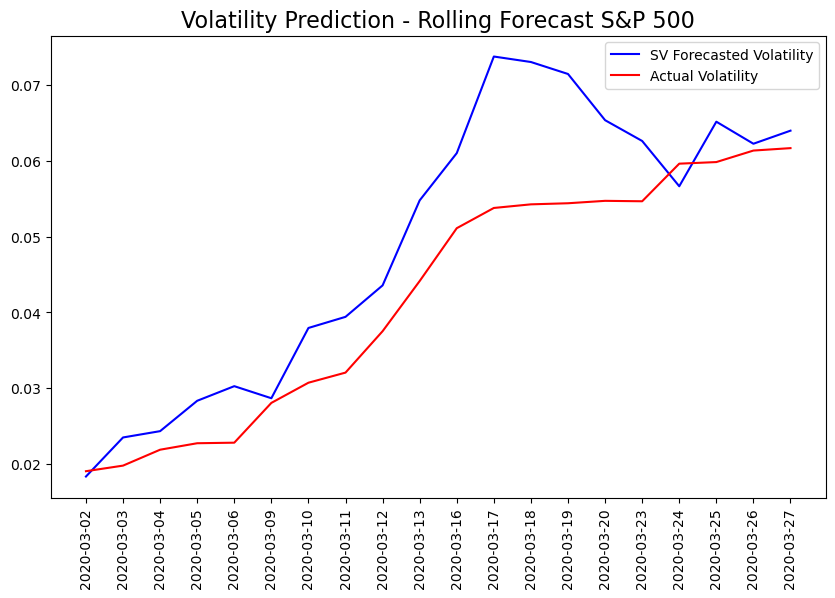

In [79]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(SP500_test.index, SP500_test_volatility, label='Actual Volatility',color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast S&P 500', fontsize=16)
plt.show()

In [80]:
mse = mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_test_volatility, SP500_forecasted_volatility)
print("Mean Absolute Error (MAE) S&P 500:", mae)

Mean Squared Error (MSE) S&P 500: 8.63645675785273e-05
Root Mean Squared Error (RMSE) S&P 500: 0.009293253874640858
Mean Absolute Error (MAE) S&P 500: 0.0073874647817176965


In [81]:
# Calculate log returns
FTSE_Logreturns = np.log(FTSE['Close'] / FTSE['Close'].shift(1)).dropna()

In [82]:
FTSE_train = FTSE_Logreturns[:-20]
FTSE_test = FTSE_Logreturns[-20:]

In [83]:
Avolatility=FTSE_Logreturns.rolling(window=20).std().dropna()

In [84]:
FTSE_test_volatility=Avolatility[-len(FTSE_test):]

In [85]:
print(FTSE_test_volatility)

Date
2020-03-02    0.014944
2020-03-03    0.014578
2020-03-04    0.015038
2020-03-05    0.015140
2020-03-06    0.016672
2020-03-09    0.023234
2020-03-10    0.022974
2020-03-11    0.022661
2020-03-12    0.032248
2020-03-13    0.033503
2020-03-16    0.033613
2020-03-17    0.035080
2020-03-18    0.034902
2020-03-19    0.035507
2020-03-20    0.035854
2020-03-23    0.035982
2020-03-24    0.042911
2020-03-25    0.044604
2020-03-26    0.044776
2020-03-27    0.045653
Name: Close, dtype: float64


In [86]:
n_samples = 2000
n_forecast = len(FTSE_test)

In [87]:
FTSE_forecasted_volatility = np.zeros(n_forecast)

In [88]:
for i in range(n_forecast):
    model = pm.Model()
    with model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = pm.GaussianRandomWalk('s', sd=sigma, shape=len(FTSE_train) + i)
        r = pm.StudentT('r', nu=nu, lam=pm.math.exp(-2*s), observed=FTSE_Logreturns[:len(FTSE_train)+i])

    with model:
        trace = pm.sample(n_samples)

    s_current = trace['s'][:, -1].mean()  # estimate current volatility state
    
    forecast_samples = np.zeros(n_samples)
    
    for j in range(n_samples):
        sigma = trace['sigma'][j]
        nu = trace['nu'][j]
        s_next = np.random.normal(loc=s_current, scale=sigma)
        r_next = np.random.standard_t(nu) * np.exp(s_next)
        forecast_samples[j] = r_next
    
    FTSE_forecasted_volatility[i] = np.std(forecast_samples)

/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.war

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 177 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 179 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 177 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 181 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 197 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 178 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 171 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 180 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 184 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 161 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 176 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 176 seconds.
The acceptance probability does not match the target. It is 0.7156403300976838, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-pac

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 191 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 194 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 196 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 190 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 179 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 172 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/malleshdharmaraj/opt/anaconda3/envs/G

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 188 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/var/folders/ln/lh4l9tm94j597f36m6pcth3r0000gn/T/ipykernel_90610/3576136976.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n_samples)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [s, nu, sigma]
/Users/malleshdharmaraj/opt/anaconda3/envs/GARCHandSV/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 199 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


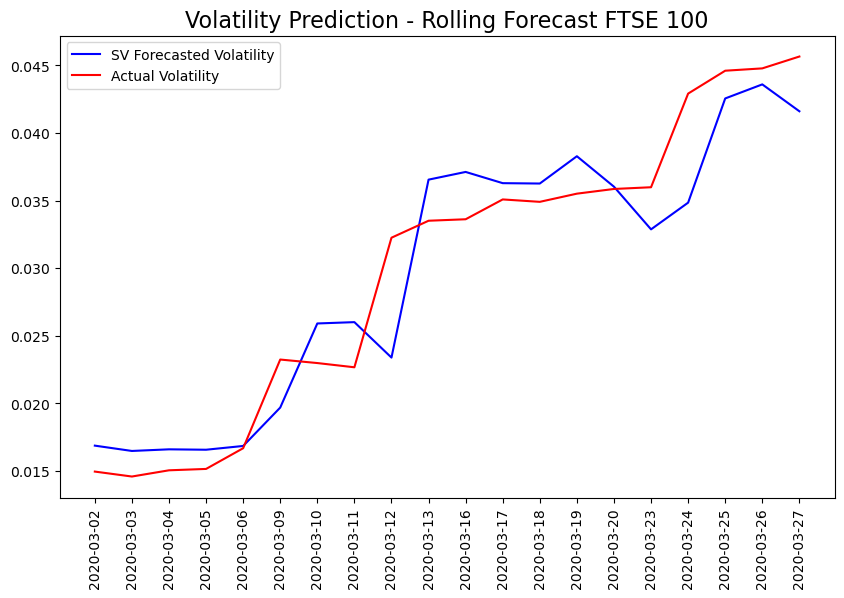

In [89]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_forecasted_volatility, label='SV Forecasted Volatility',color='blue')
plt.plot(FTSE_test.index, FTSE_test_volatility, label='Actual Volatility', color='red')
plt.legend()
plt.xticks(rotation='vertical')
plt.title('Volatility Prediction - Rolling Forecast FTSE 100', fontsize=16)
plt.show()

In [90]:
mse = mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_test_volatility, FTSE_forecasted_volatility)
print("Mean Absolute Error (MAE) FTSE 100:", mae)

Mean Squared Error (MSE) FTSE 100: 1.260266274414096e-05
Root Mean Squared Error (RMSE) FTSE 100: 0.003550022921635994
Mean Absolute Error (MAE) FTSE 100: 0.0028076345441494354


In [91]:
print(SP500_forecasted_volatility)

[0.01830491 0.02346311 0.02429694 0.02830679 0.03023639 0.02864264
 0.03792221 0.03939132 0.04354525 0.05477131 0.06101052 0.07376557
 0.07304142 0.07145994 0.06535813 0.06261392 0.0566341  0.0651598
 0.06224887 0.06397596]


In [92]:
# Convert log volatilities to percentage volatilities
SP500_percentage_forecasted = 100 * (np.exp(SP500_forecasted_volatility) - 1)

In [93]:
print(SP500_percentage_forecasted)

[1.8473468  2.37405334 2.45945163 2.87112323 3.06981563 2.90567809
 3.86504354 4.01774496 4.45072537 5.62990241 6.29100963 7.65543951
 7.57750993 7.4075122  6.75412732 6.46157311 5.8268523  6.73295733
 6.42271699 6.60667678]


In [94]:
# Convert log volatilities to percentage volatilities
SP500_percentage_Actual = 100* (np.exp(SP500_test_volatility) - 1)

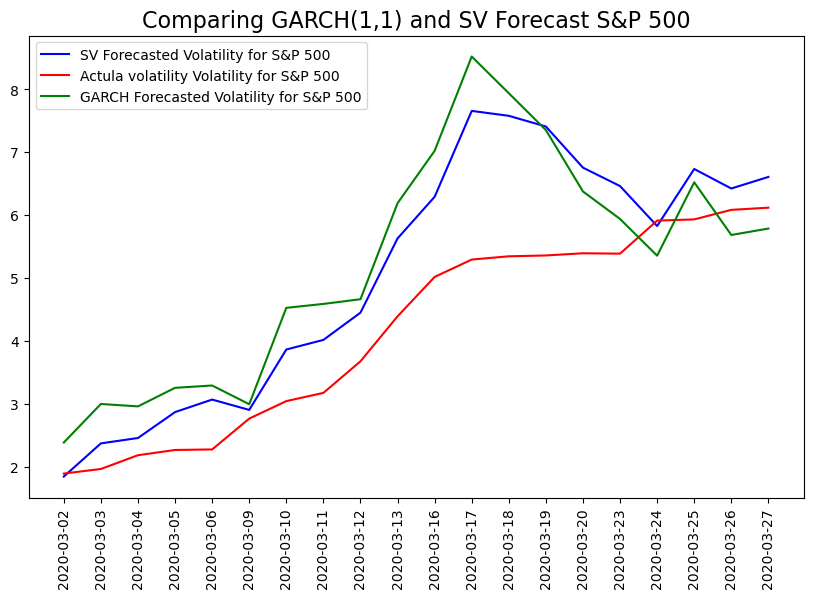

In [95]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(SP500_test.index, SP500_percentage_forecasted, label='SV Forecasted Volatility for S&P 500', color='blue')
#plt.plot(SP500_test.index, SP500_percentage_Actual, label='log volatility to actual volatility')
plt.plot(SP500_test.index, SP500.Volatility[-test_size1:], label='Actula volatility Volatility for S&P 500', color='red')
plt.plot(SP500_test.index, rolling_predictions1, label='GARCH Forecasted Volatility for S&P 500', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast S&P 500', fontsize=16)
plt.show()

In [96]:
mse = mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500_percentage_Actual, SP500_percentage_forecasted)
print("SV Mean Absolute Error (MAE) S&P 500:", mae)

SV Mean Squared Error (MSE) S&P 500: 0.9683382970032264
SV Root Mean Squared Error (RMSE) S&P 500: 0.9840418166944057
SV Mean Absolute Error (MAE) S&P 500: 0.778378479689774


In [97]:
mse = mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Squared Error (MSE) S&P 500:", mse)
rmse = root_mean_squared_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500:", rmse)
mae = mean_absolute_error(SP500.Volatility[-test_size1:], rolling_predictions1)
print("GARCH(1,1) Mean Absolute Error (MAE) S&P 500:", mae)

GARCH(1,1) Mean Squared Error (MSE) S&P 500: 1.9827058626392684
GARCH(1,1) Root Mean Squared Error (RMSE) S&P 500: 1.4080858861018628
GARCH(1,1) Mean Absolute Error (MAE) S&P 500: 1.1716287552530598


In [98]:
print(FTSE_forecasted_volatility)

[0.01686379 0.01646964 0.0165902  0.01656052 0.01683903 0.01968037
 0.02590275 0.02600112 0.02337849 0.03654431 0.03711446 0.03628387
 0.03625668 0.03827661 0.03602283 0.03286571 0.03484241 0.042552
 0.04359227 0.04160348]


In [99]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_forecasted = 100 * (np.exp(FTSE_forecasted_volatility) - 1)

In [100]:
print(FTSE_percentage_forecasted)

[1.70067873 1.66060074 1.67285814 1.66984022 1.6981606  1.98753078
 2.62411443 2.6342103  2.3653911  3.72202575 3.78118064 3.69501683
 3.69219728 3.90186    3.66795086 3.34117578 3.54565165 4.34703187
 4.45563718 4.24810338]


In [101]:
# Convert log volatilities to percentage volatilities
FTSE_percentage_Actual = 100* (np.exp(FTSE_test_volatility) - 1)

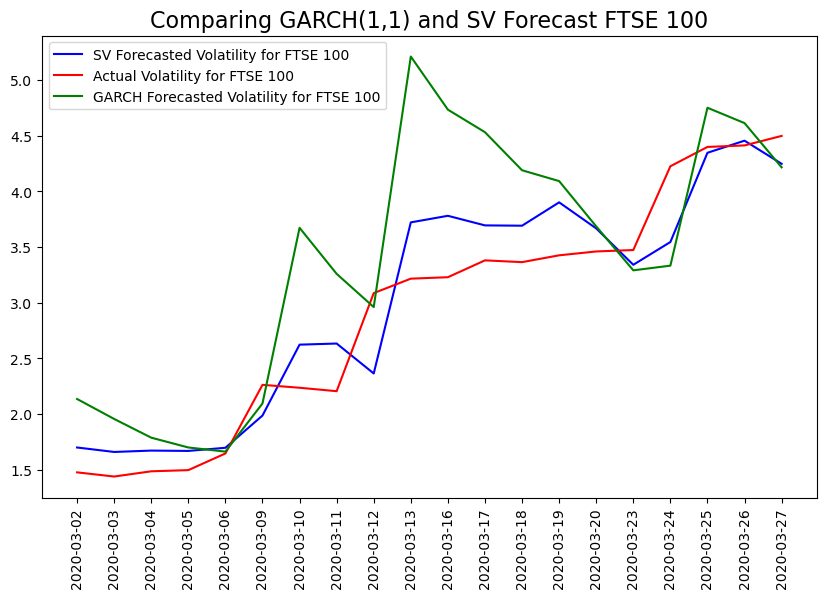

In [102]:
# Plot the forecasted and actual volatility

plt.figure(figsize=(10, 6))
plt.plot(FTSE_test.index, FTSE_percentage_forecasted, label='SV Forecasted Volatility for FTSE 100', color='blue')
#plt.plot(FTSE_test.index, FTSE_percentage_Actual, label='log volatility to actual volatility')
plt.plot(FTSE_test.index, FTSE.Volatility[-test_size1:], label='Actual Volatility for FTSE 100', color='red')
plt.plot(FTSE_test.index, rolling_predictions2, label='GARCH Forecasted Volatility for FTSE 100', color='green')
plt.xticks(rotation='vertical')
plt.legend()
plt.title('Comparing GARCH(1,1) and SV Forecast FTSE 100', fontsize=16)
plt.show()

In [103]:
mse = mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE_percentage_Actual, FTSE_percentage_forecasted)
print("SV Mean Absolute Error (MAE) FTSE 100:", mae)

SV Mean Squared Error (MSE) FTSE 100: 0.13441714073963937
SV Root Mean Squared Error (RMSE) FTSE 100: 0.36662943245140506
SV Mean Absolute Error (MAE) FTSE 100: 0.2896864046391334


In [104]:
mse = mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Squared Error (MSE) FTSE 100:", mse)
rmse = root_mean_squared_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100:", rmse)
mae = mean_absolute_error(FTSE.Volatility[-test_size2:], rolling_predictions2)
print("GARCH(1,1) Mean Absolute Error (MAE) FTSE 100:", mae)

GARCH(1,1) Mean Squared Error (MSE) FTSE 100: 0.6932806708233332
GARCH(1,1) Root Mean Squared Error (RMSE) FTSE 100: 0.8326347763715694
GARCH(1,1) Mean Absolute Error (MAE) FTSE 100: 0.6377849401265023
